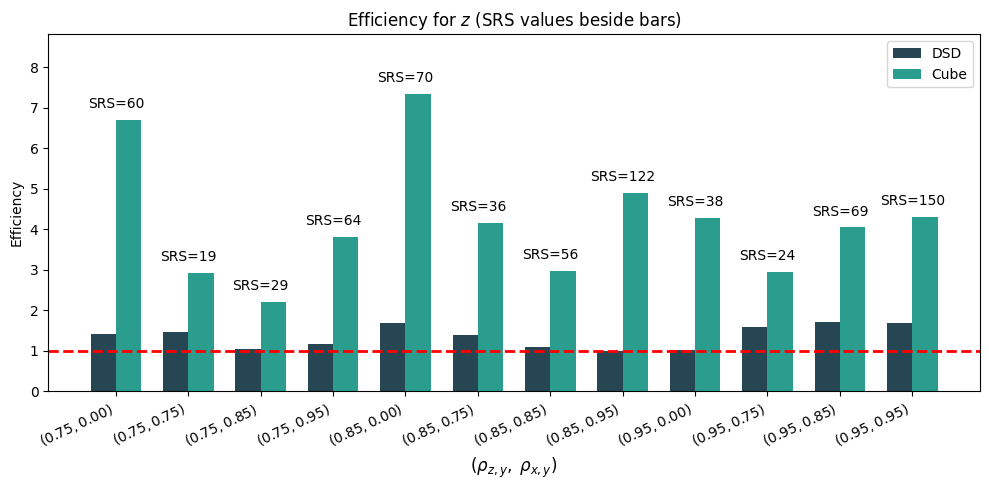

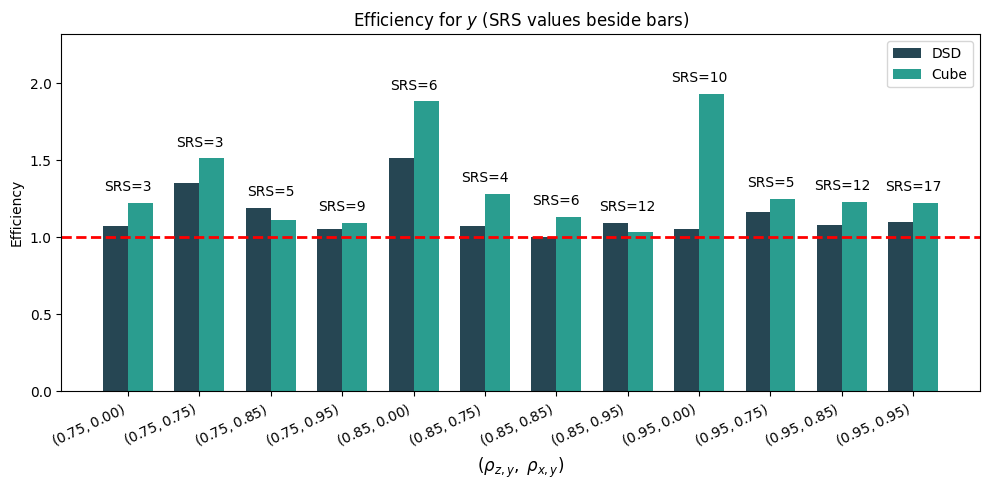

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = [
    [0.75, 0.00, 1.42, 6.69, 60.04, 1.07, 1.22, 2.73],
    [0.75, 0.75, 1.47, 2.92, 18.66, 1.35, 1.51, 3.18],
    [0.75, 0.85, 1.05, 2.21, 28.77, 1.19, 1.11, 4.58],
    [0.75, 0.95, 1.16, 3.81, 63.93, 1.05, 1.09, 9.36],
    [0.85, 0.00, 1.68, 7.34, 70.48, 1.51, 1.88, 6.31],
    [0.85, 0.75, 1.38, 4.15, 35.85, 1.07, 1.28, 3.50],
    [0.85, 0.85, 1.09, 2.96, 55.52, 1.00, 1.13, 5.60],
    [0.85, 0.95, 1.00, 4.90, 122.3, 1.09, 1.03, 11.6],
    [0.95, 0.00, 1.02, 4.28, 37.56, 1.05, 1.93, 9.86],
    [0.95, 0.75, 1.58, 2.93, 24.15, 1.16, 1.25, 4.73],
    [0.95, 0.85, 1.70, 4.04, 69.31, 1.08, 1.23, 12.3],
    [0.95, 0.95, 1.67, 4.31, 149.7, 1.10, 1.22, 16.6]
]
columns = ['rho_zy', 'rho_py', 'DSD-z','Cube-z','SRS-z','DSD-y','Cube-y','SRS-y']
df = pd.DataFrame(data, columns=columns)
df['label'] = df.apply(lambda x: f"$({x['rho_zy']:.2f},{x['rho_py']:.2f})$", axis=1)

width = 0.35
x = np.arange(len(df))
# Two beautiful contrasting colors:
colors = ['#2b8cbe', '#de2d26']  # blue, red
colors = ['#1b9e77', '#ff9900']  # teal & orange
# or
#colors = ['#7570b3', '#66a61e']  # purple & green
colors = ['#FFD700', '#003366']

colors = ['#264653', '#2a9d8f']
def plot_efficiency(df, dsd_col, cube_col, srs_col, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    dsd_bars = ax.bar(x - width/2, df[dsd_col], width, label='DSD', color=colors[0])
    cube_bars = ax.bar(x + width/2, df[cube_col], width, label='Cube', color=colors[1])
    # Horizontal line at y=1
    ax.axhline(1, linestyle='--', color='red', lw=2)
    
    # Compute a nice y-limit for the plot (20% higher than max visible bar)
    bar_max = max(df[dsd_col].max(), df[cube_col].max())
    ax.set_ylim(0, bar_max * 1.20)

    # Add SRS values as text ABOVE the highest Cube or DSD bar, NOT the SRS value!
    for i, val in enumerate(df[srs_col]):
        bar_height = max(df[dsd_col][i], df[cube_col][i])
        ax.text(x[i], bar_height + 0.03*bar_max, 
                f"SRS={val:.0f}", ha='center', va='bottom', fontsize=10,
                color='black', clip_on=False)

    ax.set_xticks(x)
    ax.set_xticklabels(df['label'], rotation=25, ha='right')
    ax.set_ylabel('Efficiency')
    ax.set_xlabel(r'$(\rho_{z,y},\; \rho_{x,y})$', fontsize=12)
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_efficiency(df, 'DSD-z', 'Cube-z', 'SRS-z', 'Efficiency for $z$ (SRS values beside bars)')
plot_efficiency(df, 'DSD-y', 'Cube-y', 'SRS-y', 'Efficiency for $y$ (SRS values beside bars)')

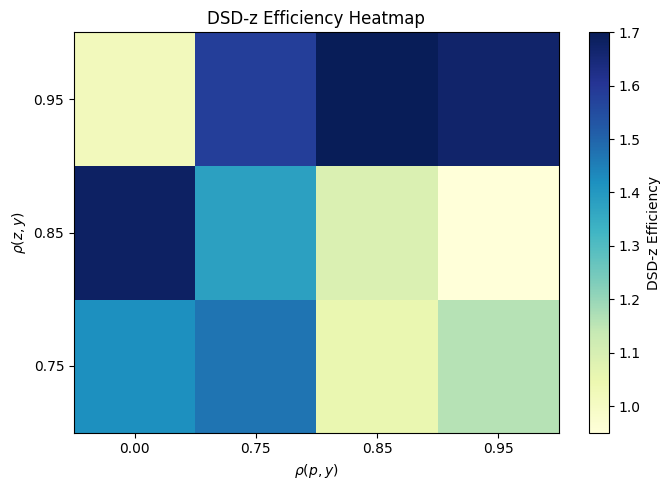

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Using your data
data = [
    [0.75, 0.00, 1.42, 6.69, 60.04, 1.07, 1.22, 2.73],
    [0.75, 0.75, 1.47, 2.92, 18.66, 1.35, 1.51, 3.18],
    [0.75, 0.85, 1.05, 2.21, 28.77, 1.19, 1.11, 4.58],
    [0.75, 0.95, 1.16, 3.81, 63.93, 1.05, 1.09, 9.36],
    [0.85, 0.00, 1.68, 7.34, 70.48, 1.51, 1.88, 6.31],
    [0.85, 0.75, 1.38, 4.15, 35.85, 1.07, 1.28, 3.50],
    [0.85, 0.85, 1.09, 2.96, 55.52, 0.99, 1.13, 5.60],
    [0.85, 0.95, 0.95, 4.72, 117.8, 1.09, 1.03, 11.6],
    [0.95, 0.00, 1.02, 4.28, 37.56, 1.05, 1.93, 9.86],
    [0.95, 0.75, 1.58, 2.93, 24.15, 1.16, 1.25, 4.73],
    [0.95, 0.85, 1.70, 4.04, 69.31, 1.08, 1.23, 12.3],
    [0.95, 0.95, 1.67, 4.31, 149.7, 1.10, 1.22, 16.6]
]
columns = ['rho_zy', 'rho_py', 'DSD-z','Cube-z','SRS-z','DSD-y','Cube-y','SRS-y']
df = pd.DataFrame(data, columns=columns)
# unique, sorted correlations for grid positions
zy_order = sorted(df['rho_zy'].unique())
py_order = sorted(df['rho_py'].unique())
# Pivot the table for DSD-z
heatmap_data = df.pivot_table(index='rho_zy', columns='rho_py', values='DSD-z')
plt.figure(figsize=(7, 5))
im = plt.imshow(heatmap_data, cmap='YlGnBu', origin='lower', aspect='auto')
plt.colorbar(im, label='DSD-z Efficiency')
plt.xticks(ticks=np.arange(len(py_order)), labels=[f"{p:.2f}" for p in py_order])
plt.yticks(ticks=np.arange(len(zy_order)), labels=[f"{z:.2f}" for z in zy_order])
plt.xlabel(r'$\rho(p, y)$')
plt.ylabel(r'$\rho(z, y)$')
plt.title('DSD-z Efficiency Heatmap')
plt.tight_layout()
plt.show()

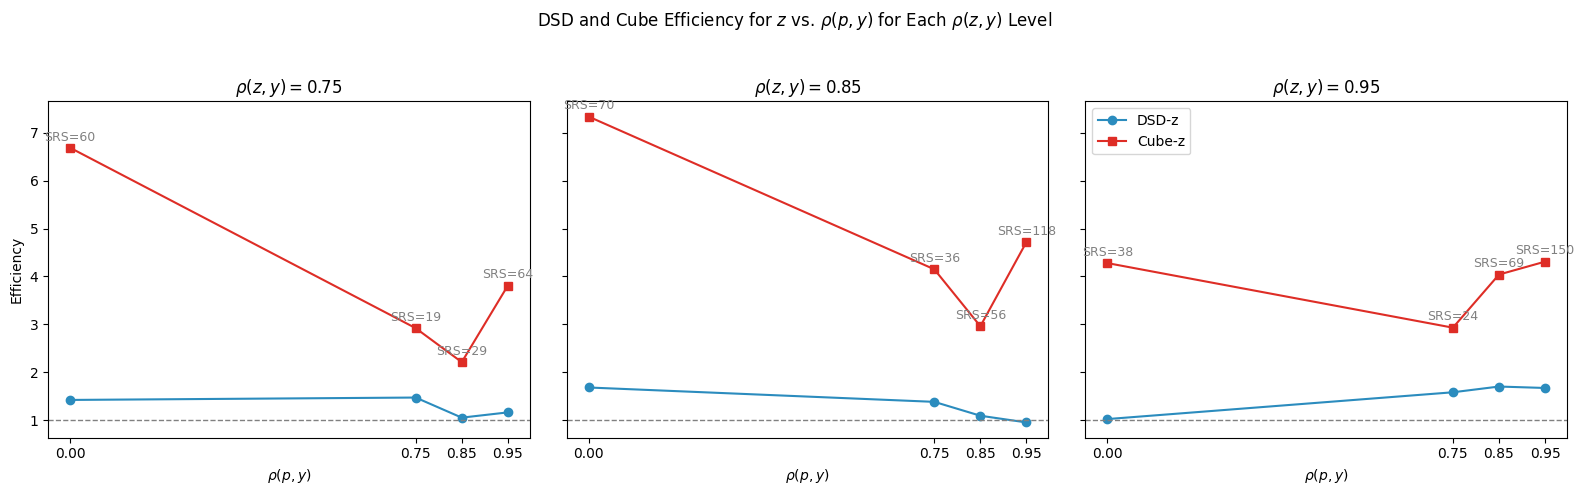

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = [
    [0.75, 0.00, 1.42, 6.69, 60.04, 1.07, 1.22, 2.73],
    [0.75, 0.75, 1.47, 2.92, 18.66, 1.35, 1.51, 3.18],
    [0.75, 0.85, 1.05, 2.21, 28.77, 1.19, 1.11, 4.58],
    [0.75, 0.95, 1.16, 3.81, 63.93, 1.05, 1.09, 9.36],
    [0.85, 0.00, 1.68, 7.34, 70.48, 1.51, 1.88, 6.31],
    [0.85, 0.75, 1.38, 4.15, 35.85, 1.07, 1.28, 3.50],
    [0.85, 0.85, 1.09, 2.96, 55.52, 0.99, 1.13, 5.60],
    [0.85, 0.95, 0.95, 4.72, 117.8, 1.09, 1.03, 11.6],
    [0.95, 0.00, 1.02, 4.28, 37.56, 1.05, 1.93, 9.86],
    [0.95, 0.75, 1.58, 2.93, 24.15, 1.16, 1.25, 4.73],
    [0.95, 0.85, 1.70, 4.04, 69.31, 1.08, 1.23, 12.3],
    [0.95, 0.95, 1.67, 4.31, 149.7, 1.10, 1.22, 16.6]
]
columns = ['rho_zy', 'rho_py', 'DSD-z','Cube-z','SRS-z','DSD-y','Cube-y','SRS-y']
df = pd.DataFrame(data, columns=columns)

# Facet grid: line plot for each rho_zy level
rho_zy_values = sorted(df['rho_zy'].unique())
nrows = 1
ncols = len(rho_zy_values)
fig, axes = plt.subplots(nrows, ncols, figsize=(16,5), sharey=True)
if ncols == 1: axes = [axes]  # in case there's just one panel

for i, rho_zy in enumerate(rho_zy_values):
    ax = axes[i]
    dsub = df[df['rho_zy'] == rho_zy].sort_values('rho_py')
    ax.plot(dsub['rho_py'], dsub['DSD-z'], marker='o', color='#2b8cbe', label='DSD-z')
    ax.plot(dsub['rho_py'], dsub['Cube-z'], marker='s', color='#de2d26', label='Cube-z')
    ax.axhline(1, linestyle='--', color='grey', lw=1)
    # Optionally: show SRS as text
    for j in range(len(dsub)):
        ax.text(dsub['rho_py'].iloc[j], max(dsub['DSD-z'].iloc[j], dsub['Cube-z'].iloc[j])+0.15, 
                f"SRS={dsub['SRS-z'].iloc[j]:.0f}", fontsize=9, color='grey', ha='center')
    ax.set_title(rf"$\rho(z,y)={rho_zy:.2f}$")
    if i == 0:
        ax.set_ylabel('Efficiency')
    ax.set_xlabel(r'$\rho(p, y)$')
    ax.set_xticks(dsub['rho_py'])

fig.suptitle("DSD and Cube Efficiency for $z$ vs. $\\rho(p, y)$ for Each $\\rho(z,y)$ Level")
plt.legend(loc='upper left')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

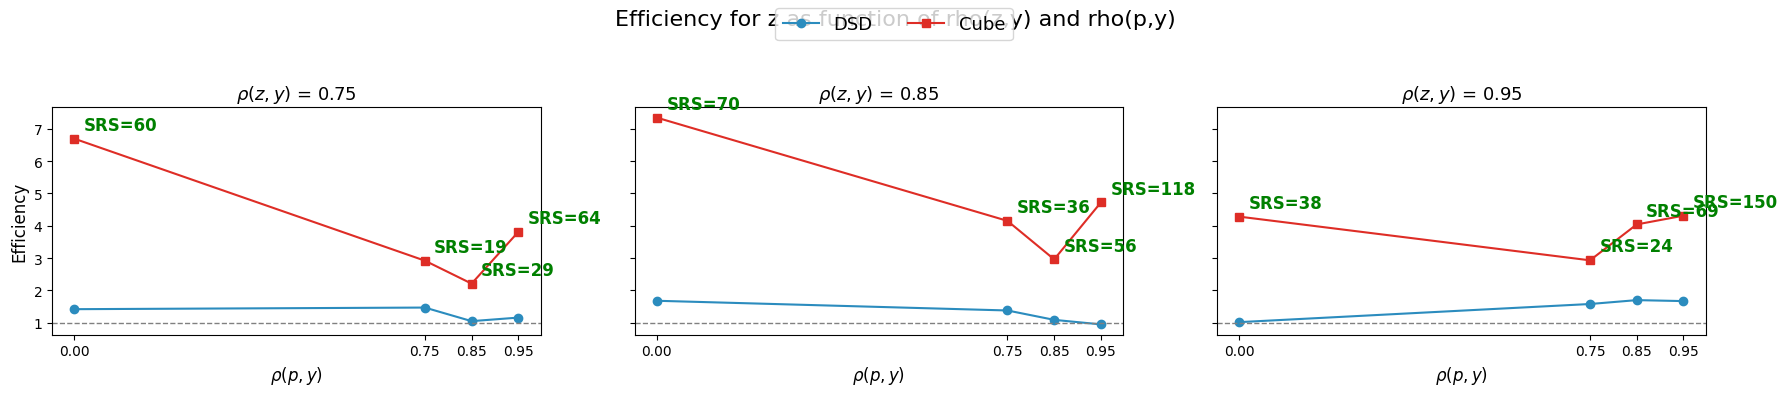

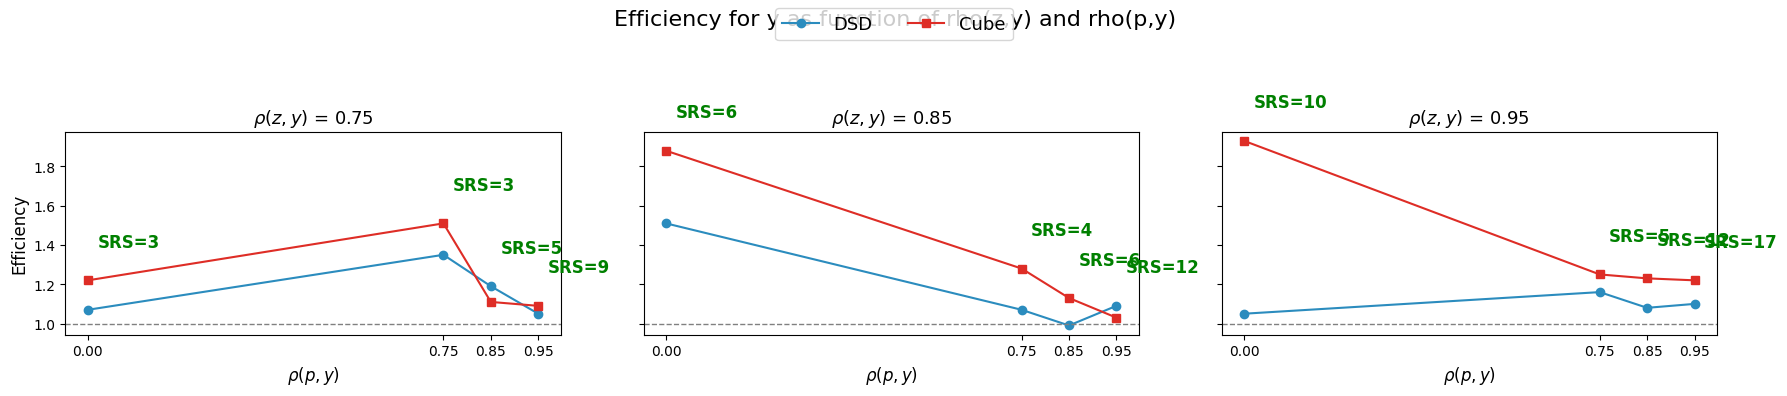

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = [
    [0.75, 0.00, 1.42, 6.69, 60.04, 1.07, 1.22, 2.73],
    [0.75, 0.75, 1.47, 2.92, 18.66, 1.35, 1.51, 3.18],
    [0.75, 0.85, 1.05, 2.21, 28.77, 1.19, 1.11, 4.58],
    [0.75, 0.95, 1.16, 3.81, 63.93, 1.05, 1.09, 9.36],
    [0.85, 0.00, 1.68, 7.34, 70.48, 1.51, 1.88, 6.31],
    [0.85, 0.75, 1.38, 4.15, 35.85, 1.07, 1.28, 3.50],
    [0.85, 0.85, 1.09, 2.96, 55.52, 0.99, 1.13, 5.60],
    [0.85, 0.95, 0.95, 4.72, 117.8, 1.09, 1.03, 11.6],
    [0.95, 0.00, 1.02, 4.28, 37.56, 1.05, 1.93, 9.86],
    [0.95, 0.75, 1.58, 2.93, 24.15, 1.16, 1.25, 4.73],
    [0.95, 0.85, 1.70, 4.04, 69.31, 1.08, 1.23, 12.3],
    [0.95, 0.95, 1.67, 4.31, 149.7, 1.10, 1.22, 16.6]
]
columns = ['rho_zy', 'rho_py', 'DSD-z','Cube-z','SRS-z','DSD-y','Cube-y','SRS-y']
df = pd.DataFrame(data, columns=columns)

def plot_facet(df, dsd_col, cube_col, srs_col, overall_title):
    rho_zy_values = sorted(df['rho_zy'].unique())
    ncols = len(rho_zy_values)
    fig, axes = plt.subplots(1, ncols, figsize=(18,4), sharey=True)
    if ncols == 1:
        axes = [axes]
    for i, rho_zy in enumerate(rho_zy_values):
        ax = axes[i]
        dsub = df[df['rho_zy'] == rho_zy].sort_values('rho_py')
        ax.plot(dsub['rho_py'], dsub[dsd_col], marker='o', color='#2b8cbe', label='DSD')
        ax.plot(dsub['rho_py'], dsub[cube_col], marker='s', color='#de2d26', label='Cube')
        ax.axhline(1, linestyle='--', color='gray', lw=1)
        # SRS: marker + number, placed to the right and just above max of that group
        for j in range(len(dsub)):
            curr_x = dsub['rho_py'].iloc[j]
            max_eff = max(dsub[dsd_col].iloc[j], dsub[cube_col].iloc[j])
            # ax.scatter(curr_x, dsub[srs_col].iloc[j], marker='x', s=80, color='green', zorder=10, 
            #            label='SRS' if j==0 else "")
            ax.text(
                curr_x + 0.02,
                max_eff + 0.15,
                f"SRS={dsub[srs_col].iloc[j]:.0f}",
                fontsize=12,
                color='green',
                fontweight='bold',
                ha='left', va='bottom'
            )
        ax.set_title(r"$\rho(z, y)$" + f" = {rho_zy:.2f}", fontsize=13)
        if i == 0:
            ax.set_ylabel('Efficiency', fontsize=12)
        ax.set_xlabel(r'$\rho(p, y)$', fontsize=12)
        ax.set_xticks(sorted(df['rho_py'].unique()))
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=13)
    # Don't use $...$ math mode in suptitle!
    fig.suptitle(overall_title, fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.92])
    plt.show()

plot_facet(df, 'DSD-z', 'Cube-z', 'SRS-z', "Efficiency for z as function of rho(z,y) and rho(p,y)")
plot_facet(df, 'DSD-y', 'Cube-y', 'SRS-y', "Efficiency for y as function of rho(z,y) and rho(p,y)")